<a href="https://colab.research.google.com/github/KSrimanNarayana/Insurance_premium_prediction/blob/main/Insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Insurance providers must precisely estimate individual health insurance costs to determine appropriate premiums. Traditional approaches typically depend on general actuarial tables and historical averages, which may overlook subtle individual differences. Utilizing machine learning allows insurers to generate more personalized and accurate cost predictions, resulting in more competitive pricing strategies and improved risk assessment.

## Need for Insurance Cost Prediction

This project addresses the critical challenges insurers encounter in setting accurate and competitive policy premiums. Inaccurate estimations can result in financial losses for insurance companies and unreasonably high costs for policyholders. By adopting a machine learning-based approach, insurers can:

- **Improve Pricing Accuracy**  
  Utilize detailed individual data to set premiums that better reflect actual risk compared to generalized estimates.

- **Boost Market Competitiveness**  
  Offer appealing and fair premium rates while maintaining profitability.

- **Enhance Policyholder Satisfaction**  
  Transparent, data-driven pricing based on personal health metrics fosters greater trust and satisfaction.

- **Enable Customization**  
  Design tailored insurance plans based on predicted individual costs to meet unique needs and preferences.

- **Strengthen Risk Evaluation**  
  Identify key cost-driving factors to refine risk assessment models.

- **Support Product Innovation**  
  Leverage model insights to guide the creation or refinement of insurance products.

- **Facilitate Strategic Planning**  
  Use predictive analytics to inform larger business strategies, such as exploring new markets or modifying policy terms.

- **Drive Customer Engagement**  
  Apply insights to deliver personalized marketing, services, and advice, enhancing overall customer interaction.


In [5]:
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import ttest_ind, f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor



import pickle
import warnings
warnings.filterwarnings("ignore")


In [6]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
data.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [8]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## Dataset Description

The dataset consists of **11 attributes** that provide information about individuals relevant to health insurance cost prediction. Below is a summary of each attribute:

- **Age**  
  Numeric value ranging from **18 to 66 years**.

- **Diabetes**  
  Binary indicator (**0 or 1**), where **1** denotes the presence of diabetes.

- **BloodPressureProblems**  
  Binary indicator (**0 or 1**), indicating whether the individual has blood pressure-related issues.

- **AnyTransplants**  
  Binary indicator (**0 or 1**), where **1** means the individual has undergone an organ transplant.

- **AnyChronicDiseases**  
  Binary indicator (**0 or 1**), representing the presence of chronic diseases.

- **Height**  
  Numeric value measured in **centimeters**, ranging from **145 cm to 188 cm**.

- **Weight**  
  Numeric value measured in **kilograms**, ranging from **51 kg to 132 kg**.

- **KnownAllergies**  
  Binary indicator (**0 or 1**), where **1** represents known allergies.

- **HistoryOfCancerInFamily**  
  Binary indicator (**0 or 1**), where **1** denotes a family history of cancer.

- **NumberOfMajorSurgeries**  
  Numeric value representing the **count of major surgeries**, ranging from **0 to 3**.

- **PremiumPrice**  
  Numeric value representing the **insurance premium**, ranging from **15,000 to 40,000** (in currency units).

> **Note:** The dataset is clean and contains **no missing (null) values**.


### Univarient Analysis

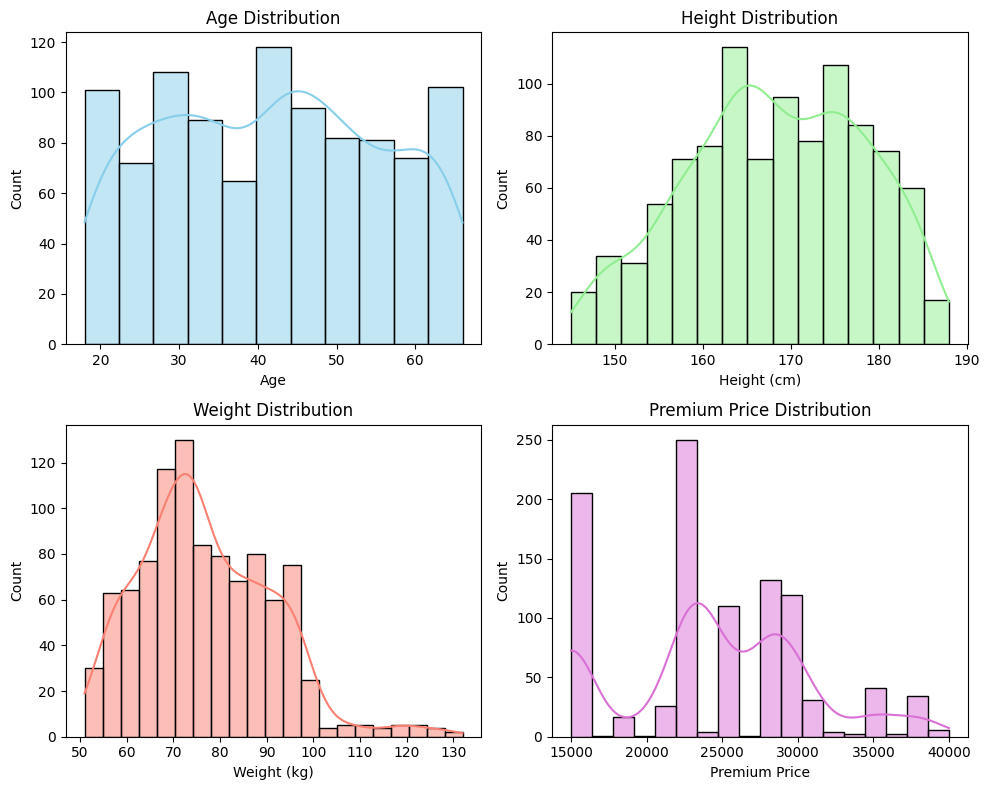

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Age
sns.histplot(data=data, x='Age', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Height
sns.histplot(data=data, x='Height', kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('Height (cm)')
axes[0, 1].set_ylabel('Count')

# Weight
sns.histplot(data=data, x='Weight', kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')
axes[1, 0].set_xlabel('Weight (kg)')
axes[1, 0].set_ylabel('Count')

# Premium Price
sns.histplot(data=data, x='PremiumPrice', kde=True, color='orchid', ax=axes[1, 1])
axes[1, 1].set_title('Premium Price Distribution')
axes[1, 1].set_xlabel('Premium Price')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


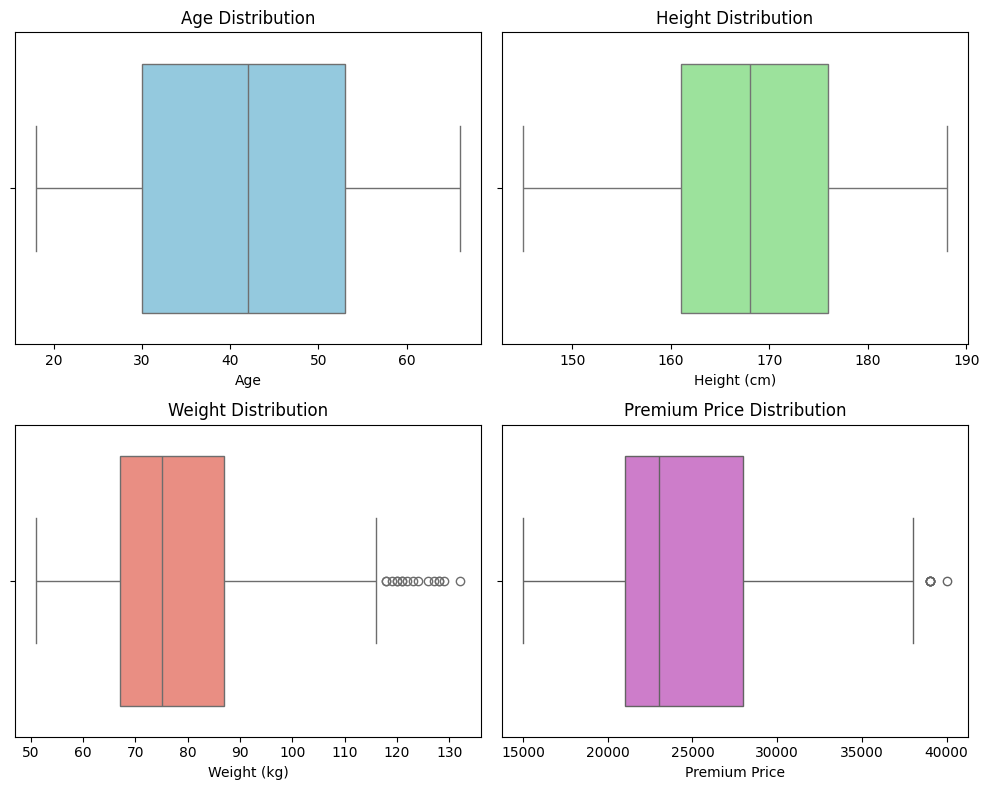

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Age
sns.boxplot(data=data, x='Age', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

# Height
sns.boxplot(data=data, x='Height', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('Height (cm)')

# Weight
sns.boxplot(data=data, x='Weight', color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')
axes[1, 0].set_xlabel('Weight (kg)')

# Premium Price
sns.boxplot(data=data, x='PremiumPrice', color='orchid', ax=axes[1, 1])
axes[1, 1].set_title('Premium Price Distribution')
axes[1, 1].set_xlabel('Premium Price')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis: Univariate Insights

### 📊 Age Distribution
- The age of individuals ranges from **18 to 66** and appears to be **evenly distributed across all age groups**.
- This indicates that people from all stages of life are opting for insurance, which is beneficial for building a **generalizable predictive model**.

### 📏 Height Distribution
- The distribution of height is **approximately Gaussian**, with a **slight left skew**.
- Most individuals fall in the **160 cm to 180 cm** range.
- While it isn't perfectly normal, the distribution is well-behaved and doesn't show extreme outliers.

### ⚖️ Weight Distribution
- Weight is **right-skewed**, with the majority between **60 kg and 100 kg**.
- There are a few values above **100 kg**, including up to **132 kg**.
- Although the boxplot flags 132 kg as a statistical outlier, it's **not an unrealistic value**. In real-world scenarios, this weight is plausible, and hence, the data is **retained without modification**.
- For reference, the heaviest recorded human weighed **635 kg**, so 132 kg is well within a realistic range.

### 💰 Premium Price Distribution
- Premiums can be grouped into three broad categories:
  - **Low**: 15,000 – 21,000
  - **Medium**: 21,000 – 33,000
  - **High**: >33,000
- Most individuals fall into the **midrange** category, suggesting commonality in health parameters like age, height, and weight.
- There are some outliers in premium prices, but these could reflect **real variations in individual health profiles**, so they are retained.

---

### 🧠 Additional Insights & Recommendation
- The current dataset includes valuable features like age, height, and weight. However, **adding a `Gender` feature** could enhance the analysis:
  - **Height and weight distributions** are strongly correlated with gender.
  - Gender-stratified insights could help in creating **more personalized pricing strategies**.
- Including gender would also allow for **stratified analysis**, potentially improving model accuracy and fairness.

> Overall, the distributions are healthy, interpretable, and reflective of real-world diversity in the population.


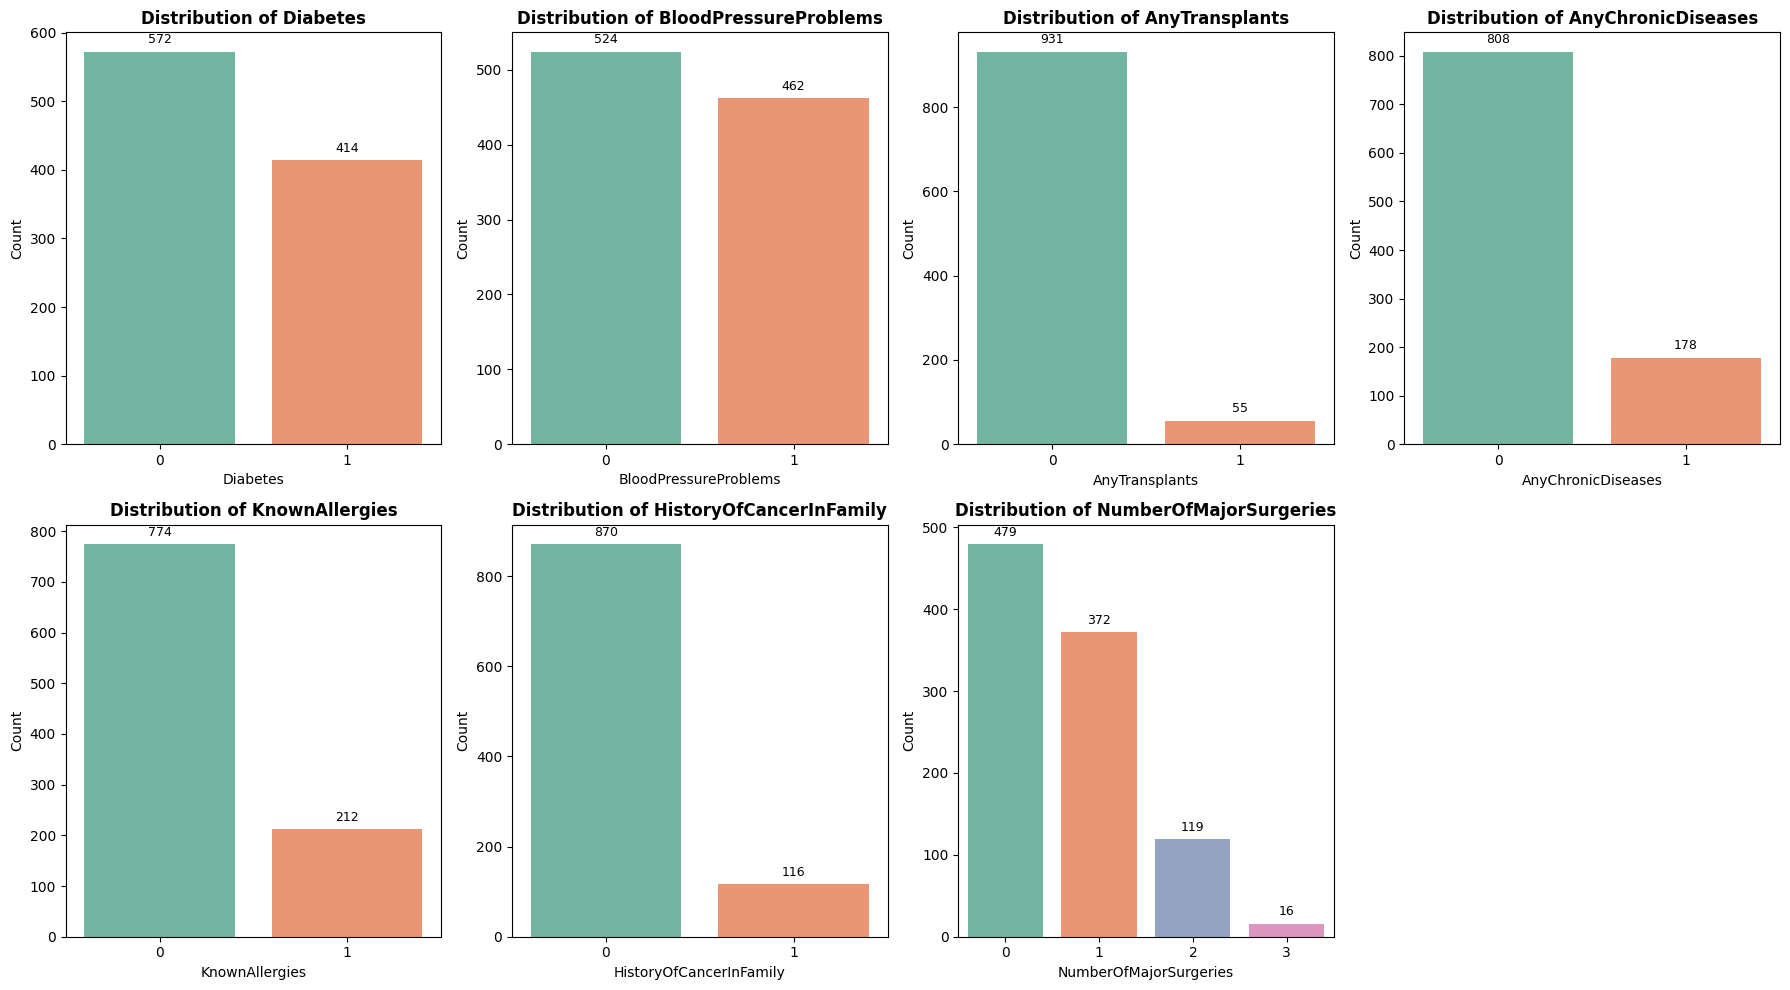

In [11]:
columns_to_plot = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
    'NumberOfMajorSurgeries'
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = sns.countplot(data=data, x=column, palette='Set2', ax=axes[i])
    ax.set_title(f'Distribution of {column}', fontsize=12, weight='bold')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Annotate counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 4),
                    textcoords='offset points')

# Turn off extra subplot if unused
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Bi Varient analysis

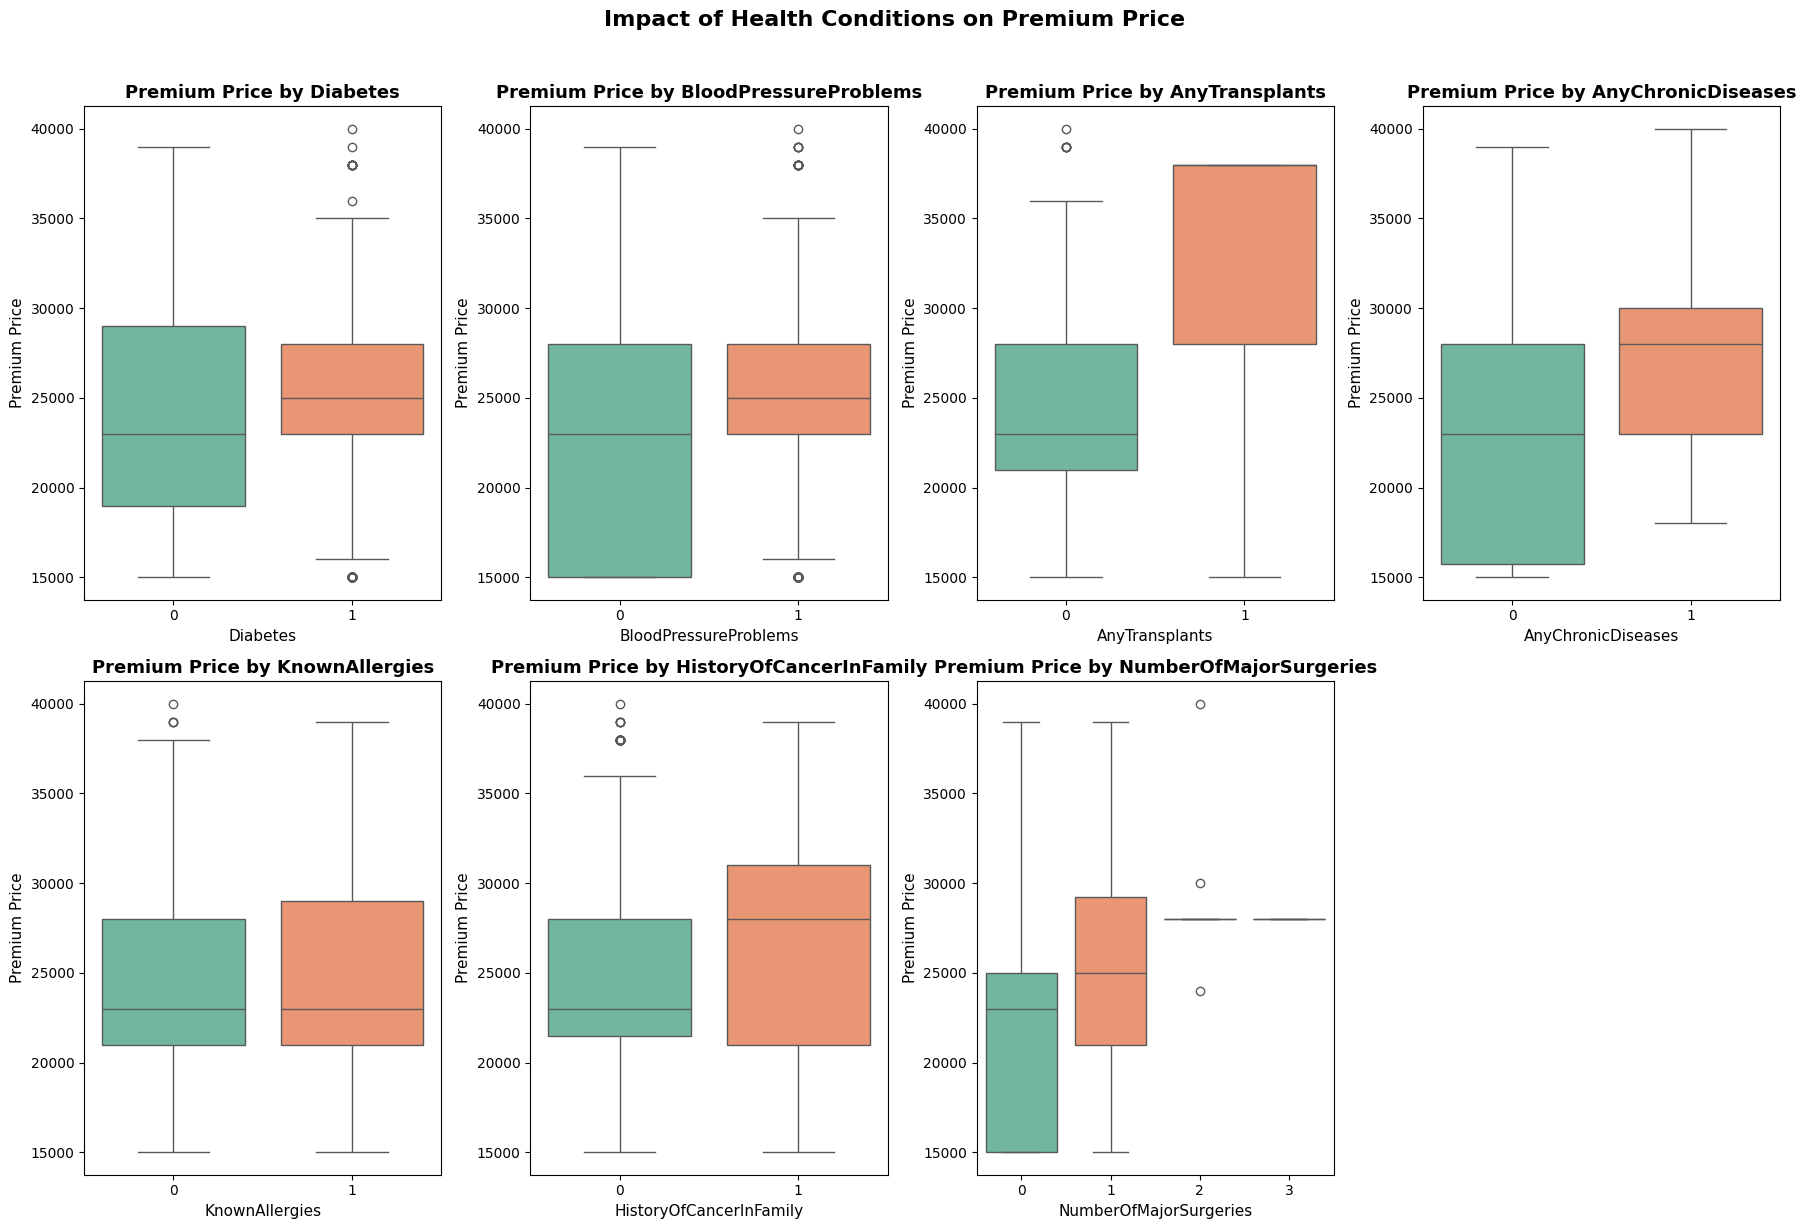

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = sns.boxplot(data=data, x=column, y="PremiumPrice", palette="Set2", ax=axes[i])
    ax.set_title(f'Premium Price by {column}', fontsize=13, fontweight='bold')
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Premium Price', fontsize=11)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Impact of Health Conditions on Premium Price', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 💡 Insights from Premium Price vs Health Condition Features

### 🔹 Diabetes
- **41% of individuals** in the dataset have diabetes.
- On average, people **with diabetes pay higher premiums** than those without.
- There are a few **outliers among diabetic patients**, likely due to the presence of **other co-occurring health conditions**, which drive up the insurance cost.

### 🔹 Blood Pressure Problems
- The premium distribution for individuals with blood pressure issues is **very similar to those with diabetes**.
- This is expected, as **blood pressure and diabetes often co-occur**, sharing several **common risk factors** such as obesity, poor diet, and lack of exercise.

### 🔹 Transplants
- Only **~5% of individuals** in the dataset have undergone a transplant.
- Their **premium prices are significantly higher**, which is justified as transplants can lead to **long-term complications** like diabetes, hypertension, or organ rejection.
- Detecting whether someone has had a transplant is **critical** in setting an accurate premium.

### 🔹 Chronic Diseases
- Individuals with chronic diseases form a **small portion** of the dataset.
- Despite the small count, their **premium prices are consistently higher**, reinforcing that **chronic illness** is a **strong risk factor** in pricing.

### 🔹 Known Allergies
- The number of people with known allergies is **very low**.
- Interestingly, the **average premium does not differ significantly** between those with and without allergies.
- This suggests that allergies might **not be a strong determinant** of premium pricing — a good candidate for **hypothesis testing**.

### 🔹 Family History of Cancer
- Around **12% of individuals** report a family history of cancer.
- These individuals tend to pay **higher premiums**, likely due to the **increased genetic risk** and long-term health uncertainty.

### 🔹 Number of Major Surgeries
- There is a **clear upward trend** in premium price as the **number of major surgeries increases**.
- This aligns with expectations, as surgeries often imply **underlying or recurring health conditions** that increase insurance risk.

---

### ✅ Summary
The above analysis highlights how different health conditions impact premium pricing. Features like **transplants**, **chronic diseases**, **diabetes**, and **surgery history** show strong influence and should be considered **key predictors** in the modeling phase. On the other hand, **allergies** may have **weaker predictive power** and warrant further statistical testing.



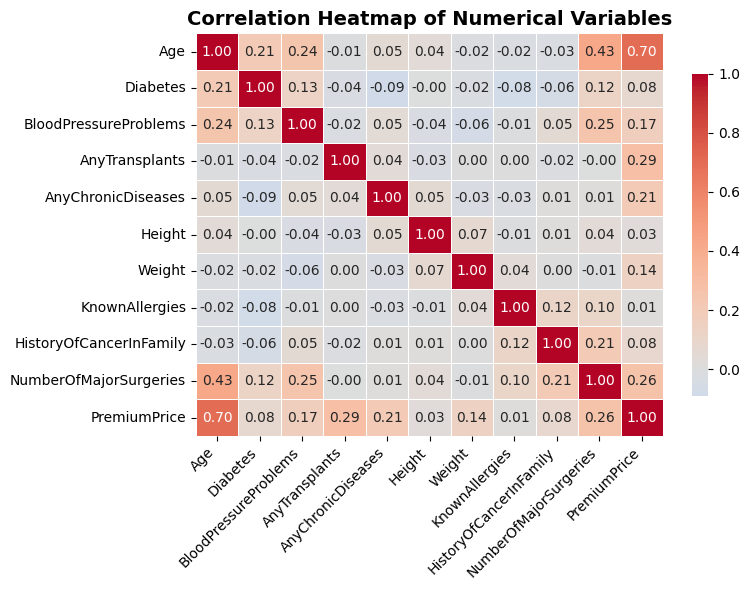

In [13]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
corr = numeric_data.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Age, transplantation, chronic disease and number of major surgeries are correlated with premium price

### Hypothesis Testing

In [14]:
def perform_t_test(data, binary_var, target_var='PremiumPrice'):
    group0 = data[data[binary_var] == 0][target_var]
    group1 = data[data[binary_var] == 1][target_var]
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    if p_val < 0.05:
        result = "Reject the null hypothesis: Significant difference in PremiumPrice."
    else:
        result = "Fail to reject the null hypothesis: No significant difference in PremiumPrice."

    return f"{binary_var} - t-statistic: {t_stat:.3f}, p-value: {p_val:.3f} - {result}"

In [15]:
binary_vars = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'
]
print("T-tests for Binary Variables (PremiumPrice):")
for var in binary_vars:
    print(perform_t_test(data, var))

T-tests for Binary Variables (PremiumPrice):
Diabetes - t-statistic: -2.449, p-value: 0.015 - Reject the null hypothesis: Significant difference in PremiumPrice.
BloodPressureProblems - t-statistic: -5.370, p-value: 0.000 - Reject the null hypothesis: Significant difference in PremiumPrice.
AnyTransplants - t-statistic: -6.260, p-value: 0.000 - Reject the null hypothesis: Significant difference in PremiumPrice.
AnyChronicDiseases - t-statistic: -7.708, p-value: 0.000 - Reject the null hypothesis: Significant difference in PremiumPrice.
KnownAllergies - t-statistic: -0.367, p-value: 0.714 - Fail to reject the null hypothesis: No significant difference in PremiumPrice.
HistoryOfCancerInFamily - t-statistic: -2.357, p-value: 0.020 - Reject the null hypothesis: Significant difference in PremiumPrice.


In [16]:
groups = [data[data["NumberOfMajorSurgeries"] == level]["PremiumPrice"] for level in data["NumberOfMajorSurgeries"].unique()]
statistic, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print( "Reject the null hypothesis: Significant difference in PremiumPrice among groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice among groups.")

Kruskal-Wallis Statistic: 93.81277073618764
P-value: 3.3223412749827346e-20
Reject the null hypothesis: Significant difference in PremiumPrice among groups.


- Only for known KnownAllergies null hypothesis is accepted; there is no significant difference in the premium price
- KnownAllergies is not that important feature so we can remove this

In [17]:
def perform_chi_square(data, var1, var2):
    print("-"*100)
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)

    if p_val < 0.05:
        result = "Reject the null hypothesis: Significant association between variables."
    else:
        result = "Fail to reject the null hypothesis: No significant association between variables."

    return f"{var1} vs {var2} - Chi-square statistic: {chi2:.3f}, p-value: {p_val:.3f} - {result}"

print("Chi-square Test Results for Categorical Variable Pairs:")
for var1, var2 in combinations(binary_vars, 2):
    print(perform_chi_square(data, var1, var2))


Chi-square Test Results for Categorical Variable Pairs:
----------------------------------------------------------------------------------------------------
Diabetes vs BloodPressureProblems - Chi-square statistic: 15.571, p-value: 0.000 - Reject the null hypothesis: Significant association between variables.
----------------------------------------------------------------------------------------------------
Diabetes vs AnyTransplants - Chi-square statistic: 1.021, p-value: 0.312 - Fail to reject the null hypothesis: No significant association between variables.
----------------------------------------------------------------------------------------------------
Diabetes vs AnyChronicDiseases - Chi-square statistic: 7.421, p-value: 0.006 - Reject the null hypothesis: Significant association between variables.
----------------------------------------------------------------------------------------------------
Diabetes vs KnownAllergies - Chi-square statistic: 5.938, p-value: 0.015 - Reje

- Diabetes vs BloodPressureProblems : Are associated with each other, meaning the presence of one is statistically significant to the presence of the other.
- Diabetes vs AnyTransplants: Presence of Diabetes does not appear to relate in any meaningful way to the individual underwent transplant
- Similarly, Diabetes vs AnyChronicDiseases, Diabetes vs KnownAllergies, KnownAllergies vs HistoryOfCancerInFamily have a significant association
-  AnyChronicDiseases vs KnownAllergies, AnyChronicDiseases vs HistoryOfCancerInFamily, AnyTransplants vs HistoryOfCancerInFamily, AnyTransplants vs KnownAllergies, AnyTransplants vs AnyChronicDiseases, BloodPressureProblems vs HistoryOfCancerInFamily,BloodPressureProblems vs KnownAllergies, BloodPressureProblems vs AnyTransplants, Diabetes vs AnyTransplants have no significant association among them

In [18]:
X = data.drop(columns = "PremiumPrice")
y = data["PremiumPrice"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 18 May 2025   Prob (F-statistic):          3.92e-210
Time:                        09:27:26   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

### **OLS Regression Summary & Interpretation**

#### **Model Evaluation Metrics**
- **R-squared = 0.643**  
  The model explains **64.3%** of the variance in premium prices. This indicates a reasonably good fit, although there is still some unexplained variability.

- **F-statistic = 175.5** with **p-value = 3.92e-210**  
  This shows that the model is **statistically significant overall**. The independent variables collectively have a significant impact on the premium price.

- **Prob (F-statistic) = 2.27e-140**  
  This confirms the **strong statistical significance** of the model even at very conservative significance levels (e.g., 0.01 or 0.001).

#### **Residual Diagnostics**
- **Skew = -0.981**  
  Indicates **positive skewness** in residuals, suggesting the presence of some large residuals on the lower side.

- **Prob(JB) = 3.68e-292**  
  The **Jarque-Bera test** rejects the null hypothesis of normality, indicating that the residuals are **not normally distributed**.

- **Condition Number = 3.33e+03**  
  A **high condition number** suggests potential **multicollinearity**. While it's not extremely severe, it warrants caution, especially with correlated predictors.

---

### **Interpretation of Coefficients**

| Feature                      | Coefficient  | Significance (p-value) | Interpretation                                                                 |
|-----------------------------|--------------|-------------------------|--------------------------------------------------------------------------------|
| **Age**                     | +329.37      | ✅ Significant           | Premium increases by ~329 units per year of age.                              |
| **Diabetes**                | -429.12      | ❌ Not significant       | Slight negative effect, not statistically meaningful.                          |
| **BloodPressureProblems**   | +180.50      | ❌ Not significant       | No meaningful impact on premiums.                                              |
| **AnyTransplants**          | +7894.20     | ✅ Highly significant     | Strong increase in premium for transplant patients.                           |
| **AnyChronicDiseases**      | +2654.89     | ✅ Significant           | Chronic disease increases premium significantly.                              |
| **Height**                  | -5.82        | ❌ Not significant       | No meaningful impact.                                                          |
| **Weight**                  | +69.68       | ✅ Significant           | Heavier individuals tend to pay more premium.                                 |
| **KnownAllergies**          | +300.88      | ❌ Not significant       | Allergies don’t significantly affect premium.                                 |
| **HistoryOfCancerInFamily** | +2311.83     | ✅ Significant           | Family history of cancer leads to higher premiums.                            |
| **NumberOfMajorSurgeries**  | -654.19      | ✅ Significant (unexpected) | Negative coefficient—may need further investigation.                           |

---

### ✅ **Recommendations & Next Steps**
- Consider transforming residuals or applying **robust regression** due to non-normality.
- Investigate **NumberOfMajorSurgeries** further — negative impact is counterintuitive.
- Add **interaction terms** (e.g., Age × ChronicDisease) to explore compound effects.
- Check **multicollinearity** using **VIF scores**.


### Feature Engineering

In [19]:
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
data['RiskScore'] = (data['Diabetes'] * 2 + data['BloodPressureProblems'] * 2 +
                     data['AnyTransplants'] * 3 + data['AnyChronicDiseases'] * 2 +
                     data['HistoryOfCancerInFamily'] * 1)


### Outlier detection and handling

In [20]:

numeric_columns = ['Age', 'Height', 'Weight', 'PremiumPrice', 'BMI',"RiskScore"]

def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]


outliers_summary = []

for column in numeric_columns:
    num_outliers_iqr = count_outliers_iqr(data, column)
    outliers_summary.append({
        'Column': column,
        'Outliers_IQR': num_outliers_iqr
    })

outliers_summary_df = pd.DataFrame(outliers_summary)

print("Number of outliers in each column (using IQR method):")
print(outliers_summary_df)


Number of outliers in each column (using IQR method):
         Column  Outliers_IQR
0           Age             0
1        Height             0
2        Weight            16
3  PremiumPrice             6
4           BMI            22
5     RiskScore             2


- There are outliers in the data and we have already seen that outliers in the weight can be a real value and premium price outliers can be cause of other medical issues a individual have
- So we don't drop them and treat them at this point as we don't have any conclusive evidence

In [21]:
# def replace_outliers_with_iqr(data, columns):
#     for column in columns:
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Replace outliers below the lower bound with the lower bound value
#         data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

#     return data
# data = replace_outliers_with_iqr(data, numeric_columns)
# data[numeric_columns].describe()

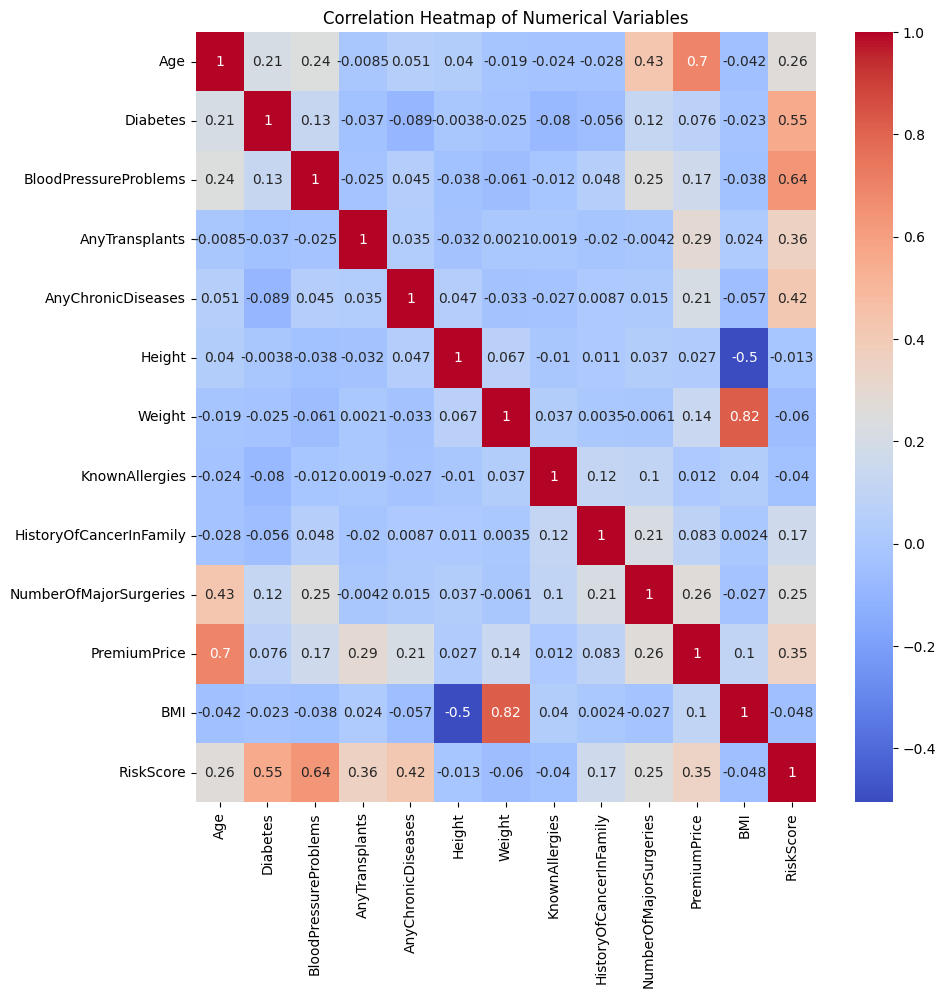

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

- Risk score is highly correlated with multiple features, multicollinearity can cause problems
- BMI is highly correlated with weight and height so again multicollinearity can cause issues

In [23]:
data.drop(columns = ["BMI", "RiskScore", "KnownAllergies"], inplace=True)

## Modeling

In [24]:
def performance_metrics(y_true, y_pred, num_features):
    r2 = np.round(r2_score(y_true, y_pred), 2)
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    adj_r2 = np.round(adj_r2, 2)
    mse = float(np.round(mean_squared_error(y_true, y_pred), 2))
    rmse = float(np.round(mse**0.5, 2))
    mape = float(np.round(mean_absolute_percentage_error(y_true, y_pred), 2))
    performance_metrics = {
        "R²": float(r2),
        "Adjusted_R²": float(adj_r2),
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape
    }
    return performance_metrics

In [25]:
X = data.drop("PremiumPrice", axis=1)
y = data["PremiumPrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 64)

### Linear Regression

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Coefficients with standardization:", lr.coef_)
lr_unstandardized = LinearRegression()
lr_unstandardized.fit(X_train, y_train)
print("Coefficients without standardization:", lr_unstandardized.coef_)

Coefficients with standardization: [4504.6982024  -296.81677259  154.304588   1723.5937264  1052.10670802
  -78.96195636  951.69183464  740.28616827 -402.48022866]
Coefficients without standardization: [ 324.29646699 -601.3711078   308.93173702 7506.68714346 2729.84589527
   -7.85941011   66.8679212  2362.14861128 -540.53328269]


In [27]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Training score", lr.score(X_train_scaled, y_train))
print("Testing Score", lr.score(X_test_scaled, y_test))

Training score 0.6279811261322467
Testing Score 0.6924704198150899


In [28]:
print("Performance on Training Data")
performance_metrics(y_train, lr.predict(X_train_scaled), X_train_scaled.shape[1])

Performance on Training Data


{'R²': 0.63,
 'Adjusted_R²': 0.63,
 'MSE': 14418242.87,
 'RMSE': 3797.14,
 'MAPE': 0.12}

In [29]:
print("Performance on Testing Data")
performance_metrics(y_test, lr.predict(X_test_scaled), X_test_scaled.shape[1])

Performance on Testing Data


{'R²': 0.69,
 'Adjusted_R²': 0.68,
 'MSE': 12178623.21,
 'RMSE': 3489.79,
 'MAPE': 0.11}

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Performance", performance_metrics(y_train, lr.predict(X_train), X_train.shape[1]))
print("Testing Performance", performance_metrics(y_test, lr.predict(X_test), X_test.shape[1]))

Training Performance {'R²': 0.63, 'Adjusted_R²': 0.63, 'MSE': 14418242.87, 'RMSE': 3797.14, 'MAPE': 0.12}
Testing Performance {'R²': 0.69, 'Adjusted_R²': 0.68, 'MSE': 12178623.21, 'RMSE': 3489.79, 'MAPE': 0.11}


- Linear Regression model is explaining 69% of the variance and mean absolute percentage error is 11%
- This is not a good prediction as we can see that RMSE is alo around 3.5k

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
print("Training Performance", performance_metrics(y_train, lr_poly.predict(X_train_poly), X_test_poly.shape[1]))
print("Testing Performance", performance_metrics(y_test, lr_poly.predict(X_test_poly), X_test_poly.shape[1]))


Training Performance {'R²': 0.72, 'Adjusted_R²': 0.7, 'MSE': 10921937.9, 'RMSE': 3304.84, 'MAPE': 0.1}
Testing Performance {'R²': 0.75, 'Adjusted_R²': 0.65, 'MSE': 9810472.64, 'RMSE': 3132.17, 'MAPE': 0.09}


- Polynomial Linear Regression is explaining 72% of variance on training and 75% of variance on test data. This is slightly better than Normal Regression model.
- MAPE is around 10% on training and 9% of test data again this is slightly better than normal linear regression model
- RMSE is reduced to 3k

### Validating the assumptions of Linear Regression

### VIF validation test for Multi collinearity

In [32]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,NumberOfMajorSurgeries,1.34
0,Age,1.32
2,BloodPressureProblems,1.09
7,HistoryOfCancerInFamily,1.07
1,Diabetes,1.06
4,AnyChronicDiseases,1.03
3,AnyTransplants,1.01
6,Weight,1.01
5,Height,1.01


- Variance inflation factor for all the features is less than 5 which indicate that there is no multicollinearity
- Assumption of linearity that there should not be any multicollinearity holds true here

In [33]:
y_test_pred = lr.predict(X_test)
residuals = y_test - y_test_pred
print("Mean of resuduals ", residuals.mean())

Mean of resuduals  -84.23216701736814


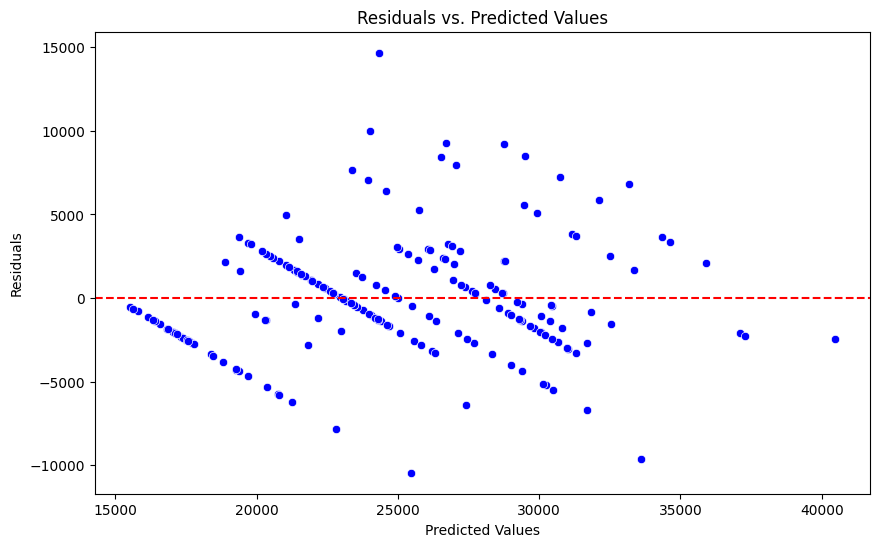

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

- There is no pattern Linearity assumption holds true here

Text(0.5, 1.0, 'Histogram of residuals')

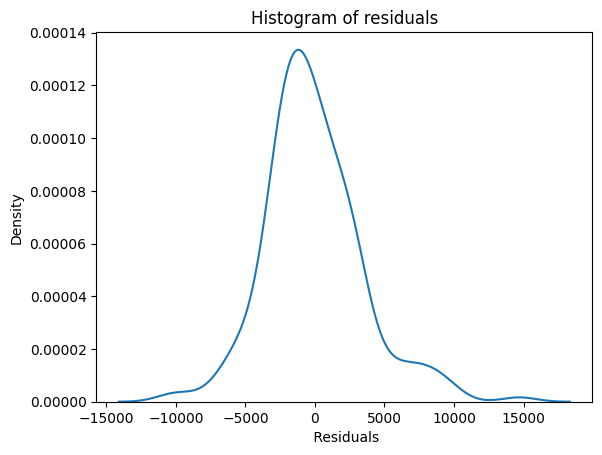

In [35]:
sns.kdeplot(residuals)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [36]:
res = stats.shapiro(residuals)
res

ShapiroResult(statistic=np.float64(0.9585565159826459), pvalue=np.float64(1.5272176810203735e-05))

p_vale is less than alpha, we reject the null hypothesis that residuals are not normally destributed

- Idealy mean of the residuals should be zero for an unbiased model, but here the mean of residuals is -89 which indicate that model is underfitting
- Destribution of residuals should look like Gaussian but with shapiro test we can confirm that destribution of residuals is not normal
- Linear assumption failed here

**Independent of errors**

In [37]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 1.7841644094562137


- Residuals have little or no autocorrelation, which is ideal.

**Heteroskedasticity should not exist**

Text(0.5, 1.0, 'Predicted values vs Residuals')

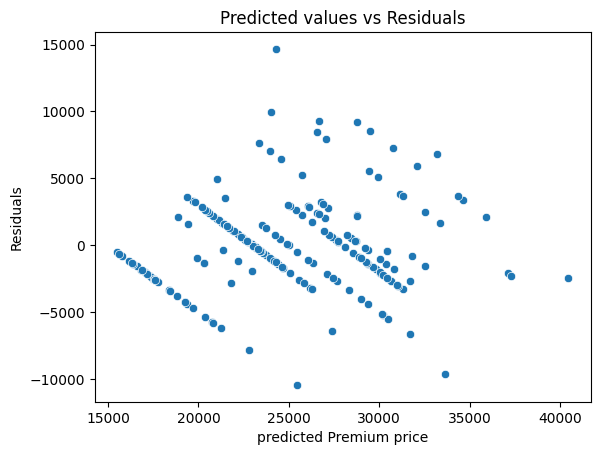

In [38]:
sns.scatterplot(x=y_test_pred,y=residuals)
plt.xlabel("predicted Premium price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- From the above it looks like Heteroskedasticity exist
- Use Goldfeld Quandt Test to check homoskedacity

In [39]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train_scaled)
lzip(name, test)

[('F statistic', np.float64(0.9868756392654079)),
 ('p-value', np.float64(0.5515296998189108))]

p-value of 0.54 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
Therefore, we accept the null hypothesis of homoscedasticity and conclude that there is no strong evidence of heteroscedasticity in the data.

- Linearity assumption hold true here

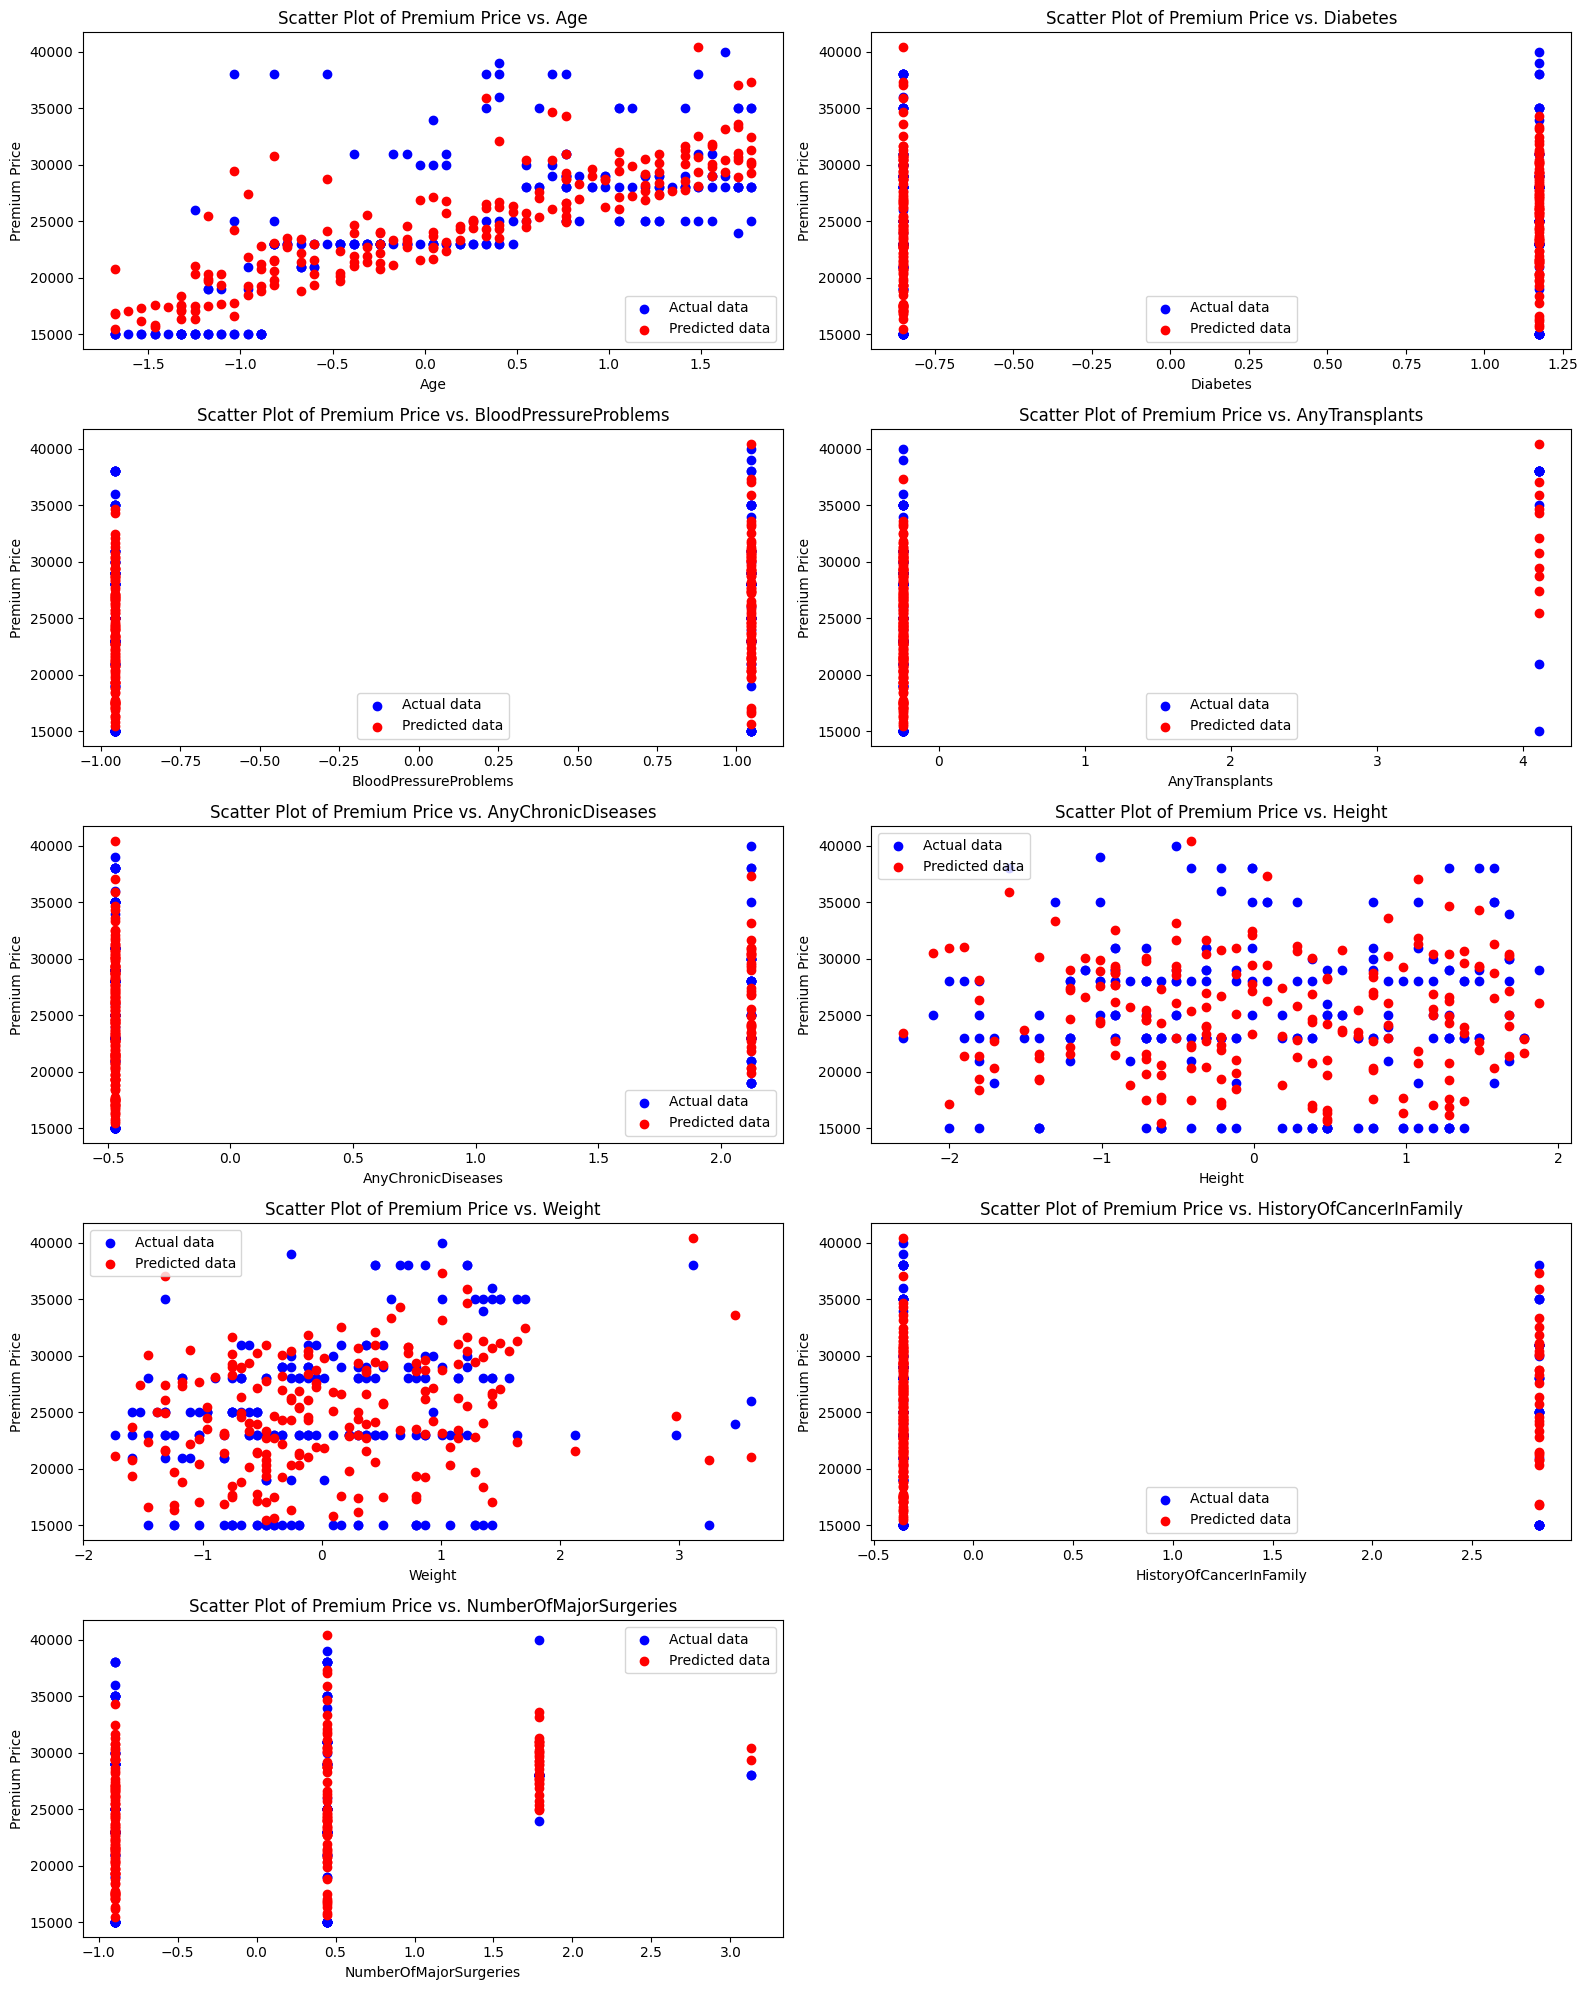

In [40]:
feature_names = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                 'Height', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, feature_name in enumerate(feature_names):
    ax = axes[i]
    X_test_feature = X_test_scaled[:, i]
    ax.scatter(X_test_feature, y_test, color='blue', label='Actual data')
    ax.scatter(X_test_feature, y_test_pred, color='red', label='Predicted data')
    ax.set_xlabel(f'{feature_name}')
    ax.set_ylabel('Premium Price')
    ax.set_title(f'Scatter Plot of Premium Price vs. {feature_name}')
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- Model is explaining only 64% of variance in the data but actual and predicted are still aligned

## Decision Tree Regressor

In [41]:
dtr = DecisionTreeRegressor(random_state=64)
dtr.fit(X_train, y_train)
print("Training Performance", performance_metrics(y_train, dtr.predict(X_train), X_train.shape[1]))
print("Test Performance", performance_metrics(y_test, dtr.predict(X_test), X_test.shape[1]))

Training Performance {'R²': 1.0, 'Adjusted_R²': 1.0, 'MSE': 0.0, 'RMSE': 0.0, 'MAPE': 0.0}
Test Performance {'R²': 0.7, 'Adjusted_R²': 0.69, 'MSE': 11742424.24, 'RMSE': 3426.72, 'MAPE': 0.04}


In [42]:
y_test_pred = dtr.predict(X_test)
residuals = y_test - y_test_pred
print("Mean of resuduals ", residuals.mean())

Mean of resuduals  25.252525252525253


- Varinace explain by the decision tree on training data is 100% but on the test data it is 70%, which is clear indication of overfitting
- MAPE on training data is 0% and on test data is 4%; this is also indicating that the model is overfitting, but MAPE is reduced to 4% compared to the linear model, which is performing well.
- Overfitting and not generalizing well

In [43]:
dtr = DecisionTreeRegressor(random_state=32)
param_grid = {
    'max_depth': [ 5,10,15,20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],

}
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
dt_best = grid_search.best_estimator_

Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 15}


In [44]:
print("Performance on Training Data", performance_metrics(y_train, dt_best.predict(X_train), X_train.shape[1]))
print("Performance on Test Data", performance_metrics(y_test, dt_best.predict(X_test), X_test.shape[1]))

Performance on Training Data {'R²': 0.86, 'Adjusted_R²': 0.86, 'MSE': 5505570.35, 'RMSE': 2346.4, 'MAPE': 0.03}
Performance on Test Data {'R²': 0.83, 'Adjusted_R²': 0.82, 'MSE': 6683448.51, 'RMSE': 2585.24, 'MAPE': 0.03}


- With hyper parameter tuning model is generalizing well
- Performance of model on both training and testing is good, with model explaining 83% of variance on test data
- Compared to linear model, performance of this model has improved

### Random Forest

In [45]:
rf = RandomForestRegressor(random_state=300)
rf.fit(X_train, y_train)
print("Training Performance", performance_metrics(y_train, rf.predict(X_train), X_train.shape[1]))
print("Testing Performance", performance_metrics(y_test, rf.predict(X_test), X_test.shape[1]))

Training Performance {'R²': 0.97, 'Adjusted_R²': 0.97, 'MSE': 1250497.97, 'RMSE': 1118.26, 'MAPE': 0.02}
Testing Performance {'R²': 0.84, 'Adjusted_R²': 0.83, 'MSE': 6193869.7, 'RMSE': 2488.75, 'MAPE': 0.04}


In [46]:
df = RandomForestRegressor(random_state=32)
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150, 200],
    'max_depth': [3,5,10,15,20,30],
    'max_leaf_nodes': [20, 40, 50, 80],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found:  {'max_depth': 15, 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [47]:
rf_best = grid_search.best_estimator_

In [48]:
print("Performance on Training Data", performance_metrics(y_train, rf_best.predict(X_train), X_train.shape[1]))
print("Performance on Test Data", performance_metrics(y_test, rf_best.predict(X_test), X_test.shape[1]))

Performance on Training Data {'R²': 0.88, 'Adjusted_R²': 0.88, 'MSE': 4671206.64, 'RMSE': 2161.3, 'MAPE': 0.03}
Performance on Test Data {'R²': 0.84, 'Adjusted_R²': 0.83, 'MSE': 6148558.87, 'RMSE': 2479.63, 'MAPE': 0.04}


- Compared to DT model, the variance explained is increased just a bit, but on both training and testing data, RMSE just dropped a bit
- This model is neither overfitting nor underfitting

### XGBoost Regressor

In [49]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=32)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters", grid_search.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [50]:
xgb_best = grid_search.best_estimator_

In [51]:
print("Performance on Training Data", performance_metrics(y_train, xgb_best.predict(X_train), X_train.shape[1]))
print("Performance on Test Data", performance_metrics(y_test, xgb_best.predict(X_test), X_test.shape[1]))

Performance on Training Data {'R²': 0.96, 'Adjusted_R²': 0.96, 'MSE': 1643471.38, 'RMSE': 1281.98, 'MAPE': 0.03}
Performance on Test Data {'R²': 0.82, 'Adjusted_R²': 0.81, 'MSE': 7102222.0, 'RMSE': 2665.0, 'MAPE': 0.05}


- This model is again showing signs of overfitting and MAPE is just increased a bit

### Gradient Boosting

In [52]:
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
gbr_best = grid_search.best_estimator_

In [ ]:
print("Performance on Training Data", performance_metrics(y_train, gbr_best.predict(X_train), X_train.shape[1]))
print("Performance on Test Data", performance_metrics(y_test, gbr_best.predict(X_test), X_test.shape[1]))

Performance on Training Data {'R²': 0.92, 'Adjusted_R²': 0.92, 'MSE': 2936400.74, 'RMSE': 1713.59, 'MAPE': 0.04}
Performance on Test Data {'R²': 0.82, 'Adjusted_R²': 0.81, 'MSE': 6933827.25, 'RMSE': 2633.22, 'MAPE': 0.05}


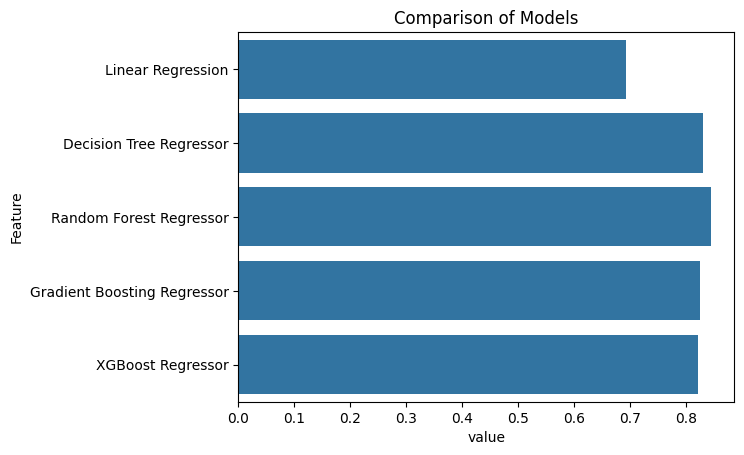

In [ ]:
results = []
model_name = ["Linear Regression","Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor", "XGBoost Regressor"]
model_object = [lr,dt_best, rf_best, gbr_best, xgb_best]

for name, model in zip(model_name, model_object):
    results.append({"Feature": name, "value": model.score(X_test, y_test)})

a = pd.DataFrame(results)

sns.barplot(x = a["value"], y = a["Feature"])
plt.title("Comparison of Models")
plt.show()

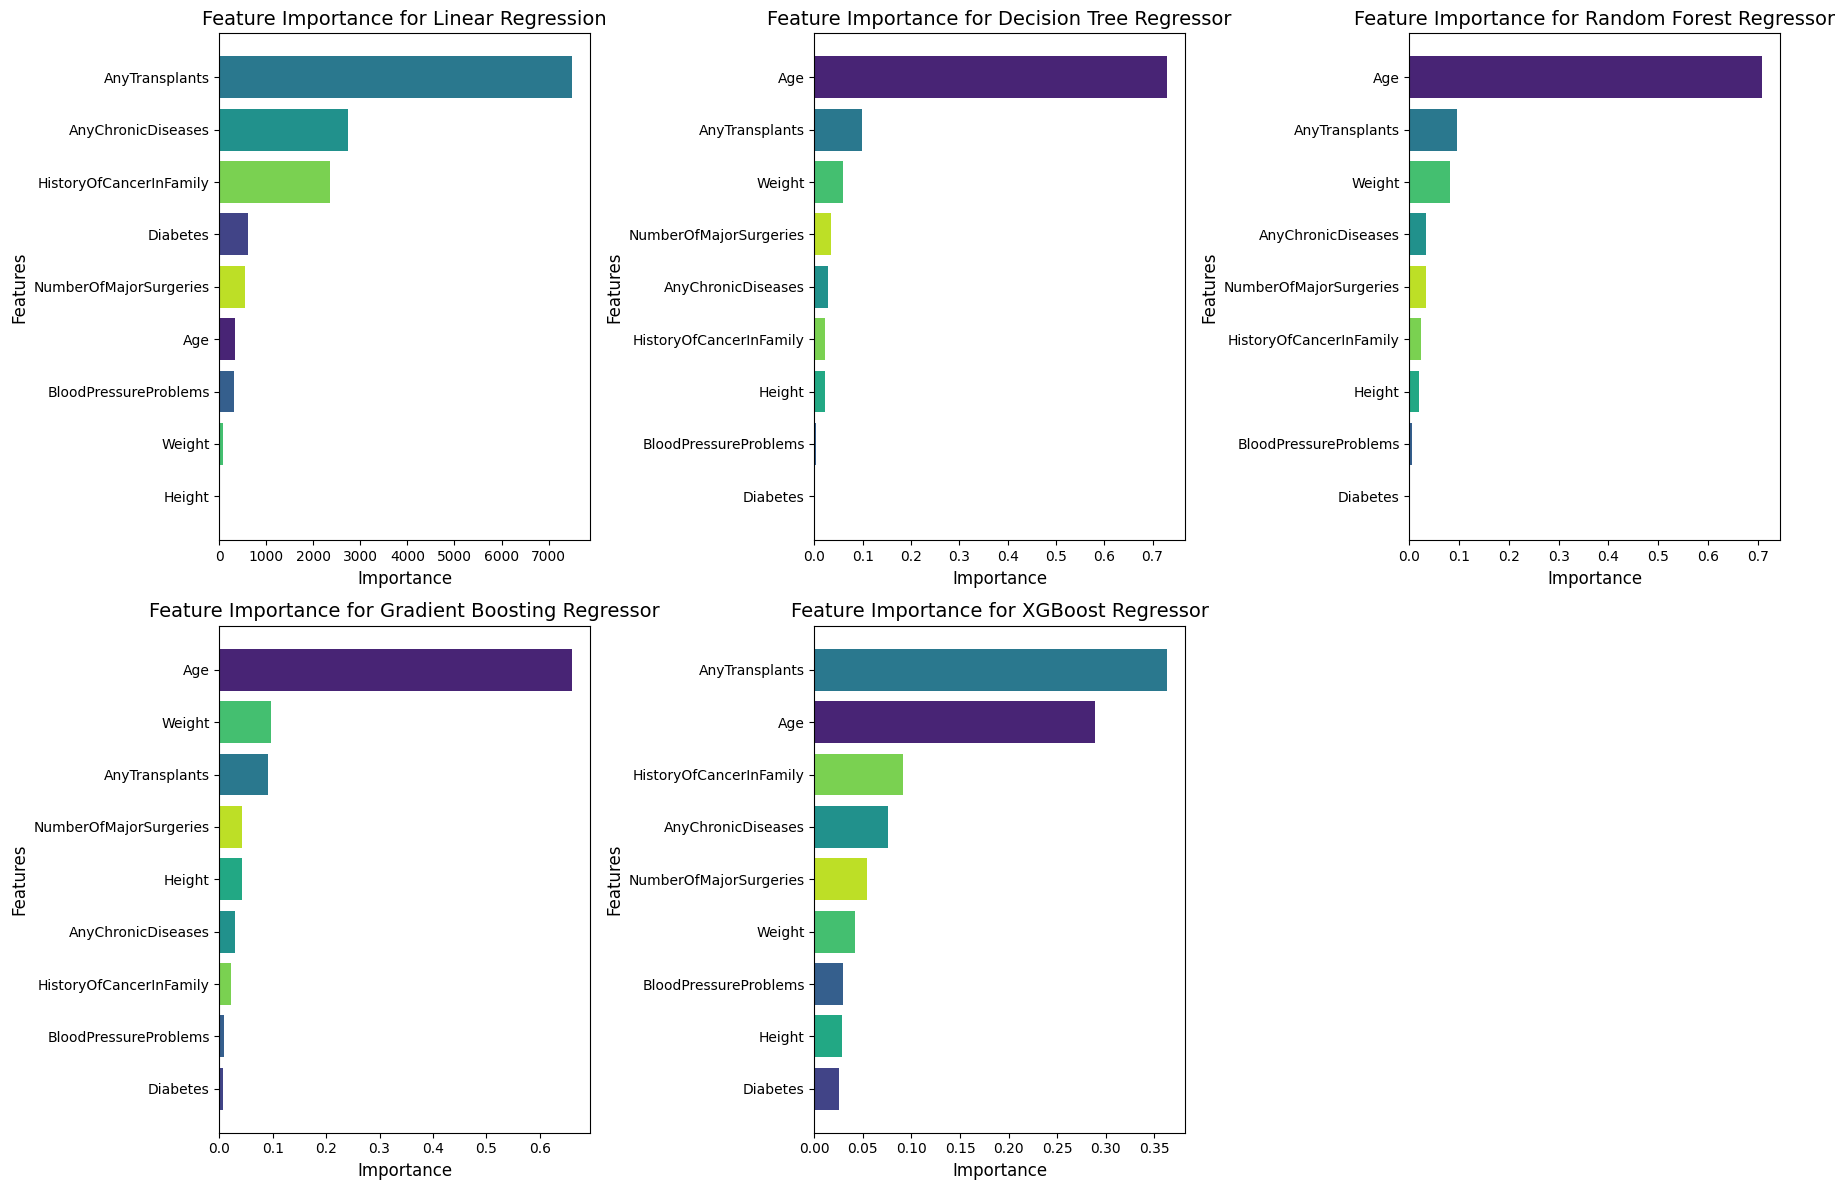

In [ ]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
colors = sns.color_palette("viridis", len(feature_names))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(zip(model_name, model_object)):
    ax = axes[i]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)

    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = np.array(feature_names)[sorted_idx]
    sorted_importances = importances[sorted_idx]

    ax.barh(sorted_features, sorted_importances, color=[colors[j] for j in sorted_idx])
    ax.set_title(f"Feature Importance for {name}", fontsize=14)
    ax.set_xlabel("Importance", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    ax.invert_yaxis()
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- Out of all the models, Random Forest is performing well so far, which is working well on both  training and testing data.
- Age, anytransplants and weight are the most important factors for tree-based models
- We can't consider the feature importance of linear regression as there are some assumptions that got faild even though it says Transplants, chronic, and history of cancer are important. All the tree-based models with hyperparameter tuning is generalizing well
- Hence we will consider the importance of tree-based models
- Diabetic and blood pressure are least important features

### Neural Network

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 615213760.0000 - val_loss: 643544768.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 581775104.0000 - val_loss: 603010304.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 534477920.0000 - val_loss: 488720736.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 409847104.0000 - val_loss: 265341328.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187333392.0000 - val_loss: 55356012.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37384308.0000 - val_loss: 30929030.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31652596.0000 - val_loss: 30436080.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33899208.0000 - val_loss: 30277364.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31042166.0000 - val_loss: 30019894.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28094234.0000 - val_loss: 29603180.0000

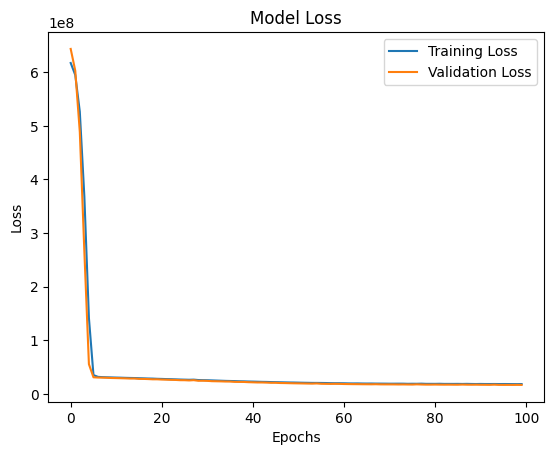

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


nn = Sequential()
nn.add(Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn.add(Dense(units=64, activation='relu'))
nn.add(Dense(units=32, activation='relu'))
nn.add(Dense(units=1))
nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
y_pred = nn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print("Performance on Training Data", performance_metrics(y_train, nn.predict(X_train), X_train.shape[1]))
print("Performance on Test Data", performance_metrics(y_test, nn.predict(X_test), X_test.shape[1]))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Performance on Training Data {'R²': 0.53, 'Adjusted_R²': 0.52, 'MSE': 18145313.35, 'RMSE': 4259.73, 'MAPE': 0.13}
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Performance on Test Data {'R²': 0.58, 'Adjusted_R²': 0.56, 'MSE': 16688804.5, 'RMSE': 4085.19, 'MAPE': 0.12}


- Neural network are not even working better than Linear Regression model
- Ranfrom forest with hyper parameter tuning will be our final model

In [ ]:
with open('artifacts/Random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)

## Insights and Recommendation

**Insights from Tableau any python**

- Age is an important parameter in determining the premium cost. As the age increases, health-related risks will also increase.
- Customers who had a history of transplants have a higher premium because of the health risks that are involved post-transplant. Also, detecting customers who gone through transplants is equally important
- Weight is also an important factor in determining the premium price. As it can give potential health risks
- As the age and weight increase, people suffering from chronic diseases will decrease
- As age increases, the chance of getting diabetes will increase
- The forecast suggests that with increase in weight, the price of the insurance premium will increase, increasing trend
- When weight increases, aVG premium for people with blood pressure problems is higher compared to that of people without blood pressure problems.
- People suffering from chronic disease have a high premium. People with chronic disease will have to pay higher minimum premiums compared to non-chronic diseased people

**Recommendations**

- **Pricing Strategy** Variables like Age, Weight, any transplants, and History of Cancer in Family significantly impact premium pricing.<br>
    Recommendation: Develop targeted premium pricing tiers. For instance:
    - High-risk individuals (e.g., with a transplant or cancer history) should be charged higher premiums.
    - Offer discounts or incentives for low-risk categories (e.g., younger age, no chronic conditions).
    - Introduce dynamic pricing models that adjust based on customer profiles, creating more personalised offers.
- **Health Monitoring programs**
      Conditions like diabetes, blood pressure problems, and chronic diseases are key factors.
    - Introduce wellness programs or health monitoring services to help manage these chronic conditions.
    - Provide premium discounts or rebates for customers who regularly monitor and control health metrics.
- **Incentives for Healthier Lifestyles** Variables like Weight and Chronic Diseases show significant impact.<br>
    Recommendation:
    - Launch campaigns promoting healthier lifestyles.
    - Reward customers with reduced premiums for maintaining an ideal BMI or attending health check-ups.
- **Data-Driven Marketing** Variables like Age and Weight correlate strongly with premium prices.<br>
    Recommendation:
    - Focus marketing efforts on younger age groups who may benefit from lower premiums.
    - Highlight the value of preventive healthcare to older customers to justify higher premiums.
- **Aditional parameters** Adding Gender, Blood group, last full body checkup, Number of past claims, smoking, pre existing diseases, regular exercise, and geolocation additional features might help in understanding individual to calculate the risk factor for premium detection

- **High Settlement Ratio and Network hospitals**<br>
  Observations: Purchase of the insurance will also depend on competitor offers<br>
  - Customers who purchase insurance will look for settlement ratio and number of network hospitals. If the performance of the company lags in this area, make sure to improve it.

- **Build Trust Through Transparency** Customers may hesitate to purchase insurance due to unclear terms or hidden costs.<br>
    Recommendation:
    - Simplify policy terms and conditions with visual aids or FAQ sections.
    - Share customer success stories and testimonials on platforms like social media or your website.
    - Offer a "no-questions-asked" cancellation period to build confidence.
- **Expand Digital Presence** Younger and tech-savvy audiences expect seamless digital experiences when purchasing insurance.<br>
    Recommendation:
    - Offer online quotes, comparisons, and purchase options through an easy-to-use website or app.
    - Provide chatbots or virtual assistants for quick customer support.
    - Use targeted digital advertising to reach specific customer profiles (e.g., individuals researching health conditions).